# Step1. Import the most up-to-date data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# create a path

path = r'C:\Users\apiny\Documents\CareerFoundry\Data Immersion\4_Intro to Programming\Instacart Basket Analysis'

In [3]:
# import a data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [5]:
# check the output

df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,status,income,...,price_label,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_spent,spending_flag,median_prior_order,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,mid-range product,Regularly busy,busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,mid-range product,Regularly busy,regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,mid-range product,Regularly busy,busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,mid-range product,Regularly busy,regularly busy,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,mid-range product,Regularly busy,slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# Step2. Create charts follow the exercise

## Bar chart

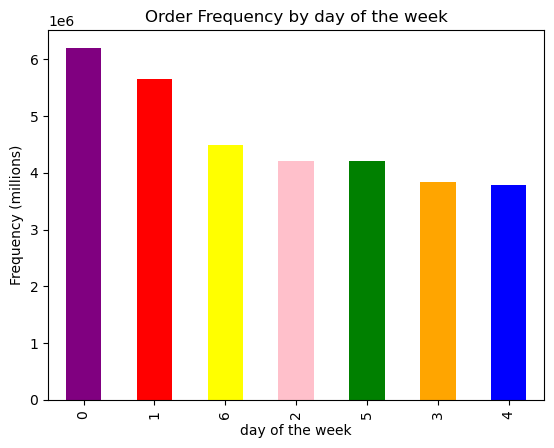

In [12]:
# create a bar chart

bar_orders_dow = df['orders_day_of_week'].value_counts().plot.bar(title='Order Frequency by day of the week', xlabel='day of the week', ylabel='Frequency (millions)', color = ['purple', 'red', 'yellow', 'pink', 'green', 'orange', 'blue'])

In [13]:
# export the bar chart as a png file

bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<Axes: xlabel='orders_day_of_week'>

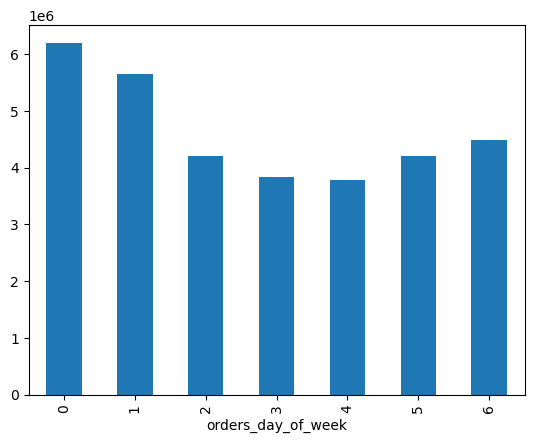

In [6]:
# sort the bars by the index of 'orders_day_of_week' column

df['orders_day_of_week'].value_counts().sort_index().plot.bar()

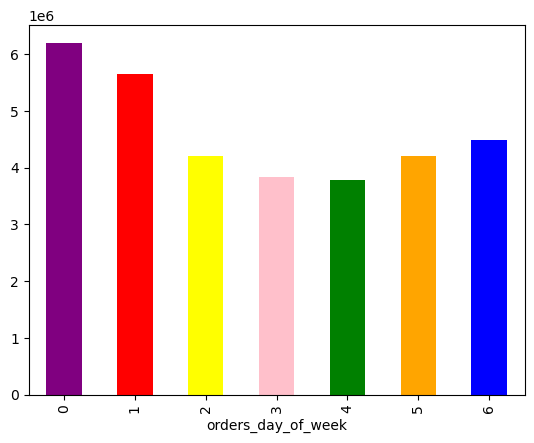

In [7]:
# add colors to the bars

bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'yellow', 'pink', 'green', 'orange', 'blue'])

In [8]:
# export the bar chart in the form of an image file

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

## Histogram

<Axes: ylabel='Frequency'>

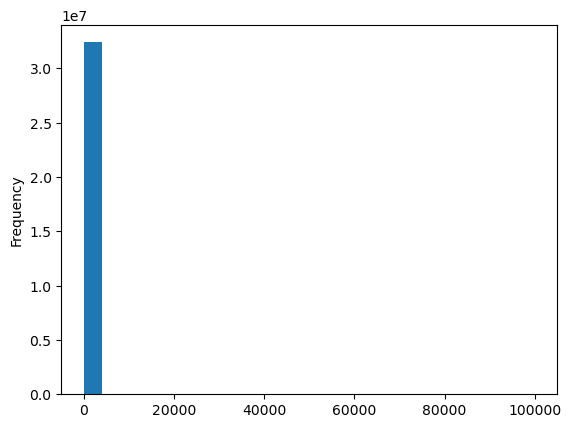

In [9]:
# create a histogram of 'prices' column
df['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

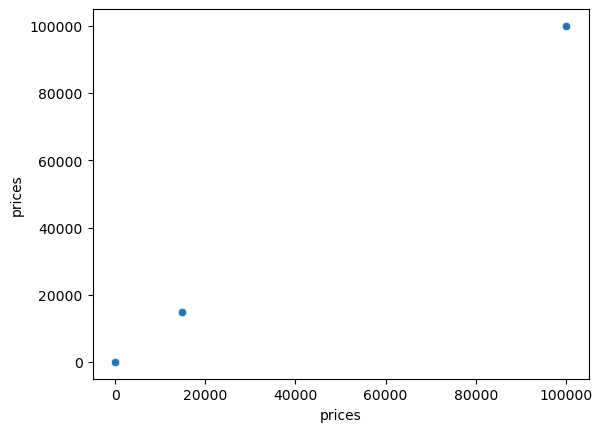

In [10]:
# investigate outliers by a scatterplot

sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [4]:
# turn outliers into NaNs

df.loc[df['prices'] > 100, 'prices'] = np.nan

<Axes: ylabel='Frequency'>

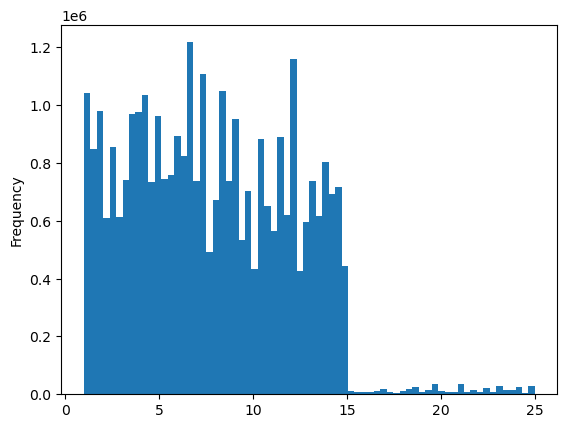

In [5]:
# recreate a histogram without outliers of 'prices' column

df['prices'].plot.hist(bins = 70)

## Line chart

In [13]:
# create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
# store 70% of th sample in the dataframe big

big = df[dev]

In [15]:
# store 30% of the sample in the dataframe small

small = df[~dev]

In [16]:
# check the samples

len(df)

32404859

In [17]:
len(big) + len(small)

32404859

In [18]:
# create a dataframe which has only necessary columns for the chart

df_2 = small[['orders_day_of_week', 'prices']]

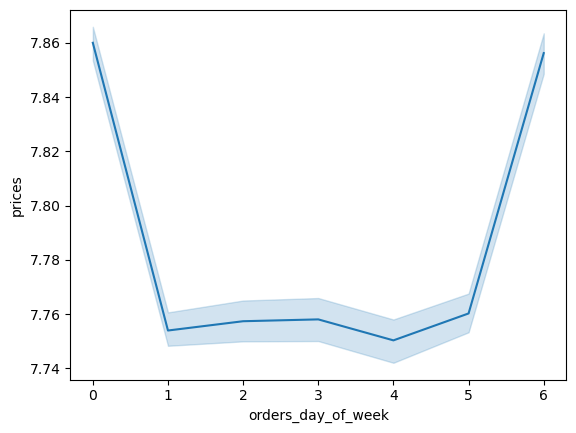

In [19]:
# create a line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

# Step 3. Create a histogram of the “order_hour_of_day” column

Text(0, 0.5, 'Frequency (millions)')

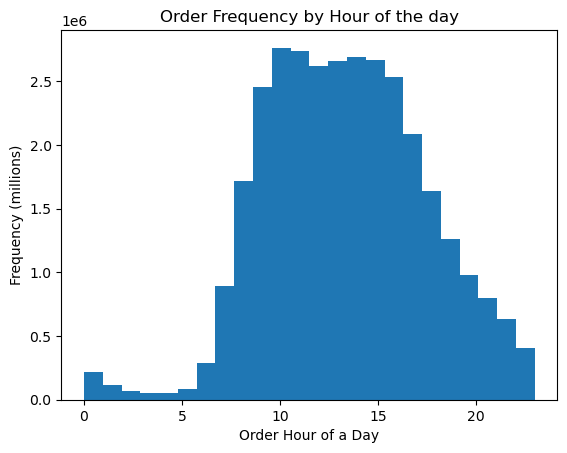

In [14]:
# create a histogram of the 'order_hour_of_day' column

hist_order_hour_of_day = df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Order Frequency by Hour of the day')
plt.xlabel('Order Hour of a Day',fontsize = 10)
plt.ylabel('Frequency (millions)', fontsize = 10)

In [15]:
# export the chart as a png file

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

The histogram illustrates that orders commence at 7 AM, reach their peak during the busiest hours at 10 AM, and gradually decrease after 5 PM. The most bustling period spans from 10 AM to 4 PM.

# Step4. Create a bar chart from the “loyalty_flag” column

Text(0, 0.5, 'loyalty_flag')

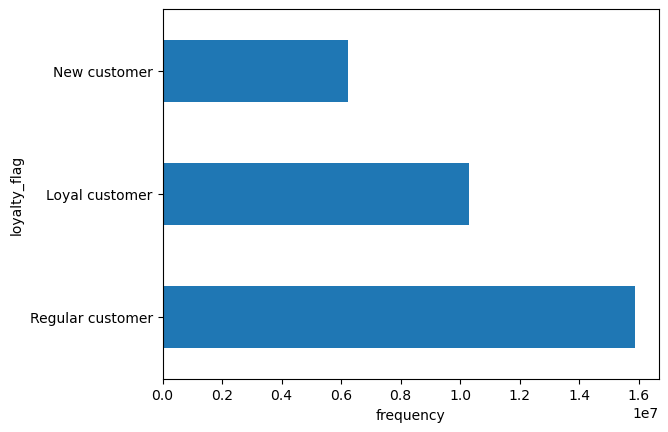

In [51]:
# create a bar chart

bar_loyalty_flag = df['loyalty_flag'].value_counts().plot.barh()
plt.xlabel('frequency', fontsize = 10)
plt.ylabel('loyalty_flag', fontsize = 10)

The most frequent orders were placed by regular customers, followed by loyal customers and new customers, respectively.

# Step5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [11]:
# create sample data

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# store 70% of the sample in the dataframe big

big = df[dev]

In [13]:
# store 30% of the sample in the datafram small

small = df[~dev]

In [14]:
# compare the numbers of rows between the whole data set and two sample sets

len(df)

32404859

In [15]:
len(big) + len(small)

32404859

In [30]:
# create a dataframe for a small sample containing only 'prices' and 'order_hour_of_day' columns

df_line = small[['order_hour_of_day', 'prices']]

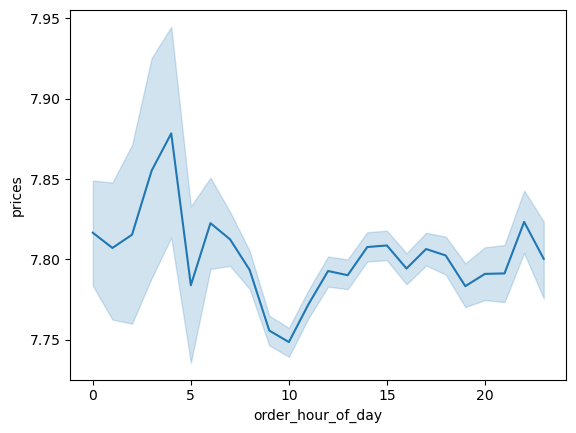

In [31]:
# create a line chart from a sample data set

line_prices_hour = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

There are no significant insights to be gained from the correlation between prices and the hour of the day, as the price range remains consistent, fluctuating only between 7.75 and 7.90 USD.

# Step6. Investigate a connection between age and family situation by creating a line chart and explore the connections between age and number of dependents

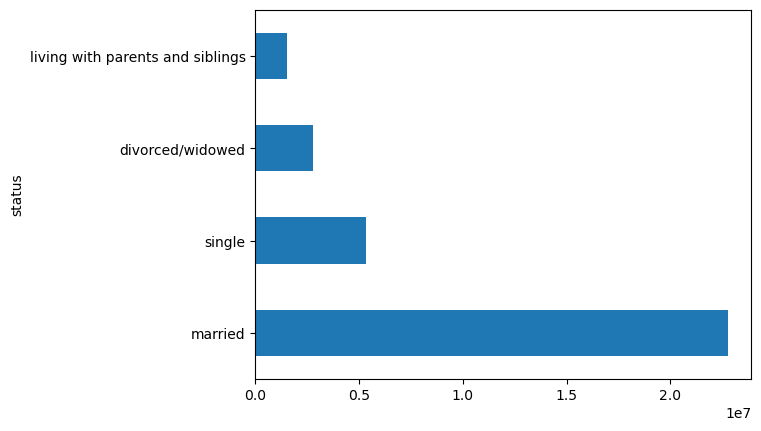

In [55]:
# create a bar chart for marital status

bar_status = df['status'].value_counts().plot.barh()

Married customers are the majority of Instacart customers.

In [24]:
# check descriptive statistics of the 'age' column 

df['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [6]:
# create a new column 'age group' 

df.loc[df['age'] < 18, 'age_group'] = 'under18'
df.loc[(df['age'] >= 18) & (df['age'] < 34), 'age_group'] = '18-33'
df.loc[(df['age'] >= 34) & (df['age'] < 50), 'age_group'] = '34-49'
df.loc[(df['age'] >= 50) & (df['age'] < 66), 'age_group'] = '50-65'
df.loc[(df['age'] >= 66) & (df['age'] < 82), 'age_group'] = '66-81'
df.loc[df['age'] >= 82, 'age_group'] = 'over82'

In [7]:
df['age_group'].value_counts(dropna = False)

age_group
34-49    8153117
18-33    8120312
66-81    8088101
50-65    8043329
Name: count, dtype: int64

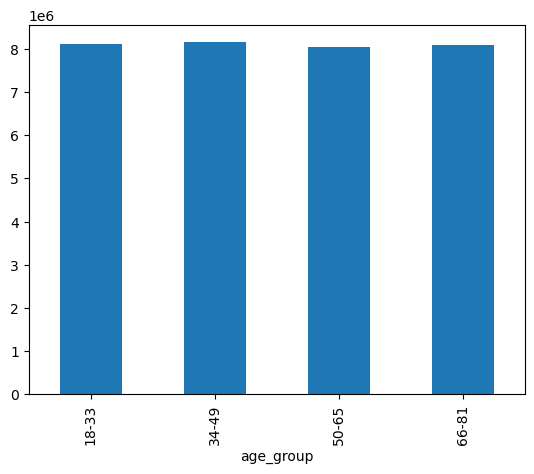

In [8]:
bar_age = df['age_group'].value_counts().sort_index().plot.bar()

The ages of customers range from 18 to 81 years, however, there are no significant correlation with the frequency of purchased orders.

In [20]:
# create a dataframe for a small sample containing only 'age_group' column

df_line_age_group_dependants = small[['age_group', 'n_dependants']]

In [30]:
# create a copy of the dataframe

df_line_age_group_dependants_copy = df_line_age_group_dependants.copy()

In [31]:
# sort the copied dataframe by the 'age_group' column

df_line_age_group_dependants_copy.sort_values(by='age_group', inplace=True)

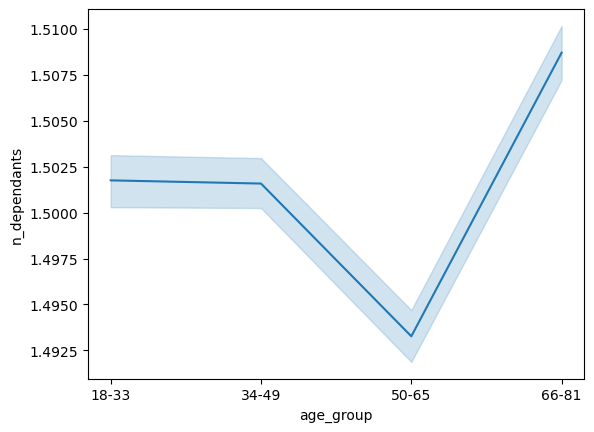

In [32]:
# create a line chart between 'n_dependants' and 'age_group' columns

line_age_group_dependants = sns.lineplot(data = df_line_age_group_dependants_copy, x = 'age_group', y = 'n_dependants')

There are no correlation between numbers of dependants and age.

# Step7. Create a scatterplot to visualize a connection between age and spending power (income).

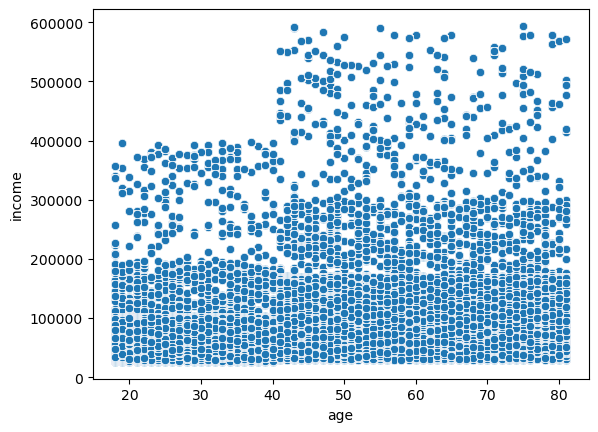

In [47]:
# create a scatterplot between 'age' and 'income' columns

scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)

Individuals younger than 40 years typically have an income range of up to 400,000 USD, whereas those aged 40 or older tend to have incomes exceeding 400,000 USD.

# Step 8. Export all the visualizations as “.png” files.

In [52]:
# export all the visualizations as png files

hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_order_hour_of_day.png'))

In [53]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [54]:
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_hour.png'))

In [56]:
bar_status.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_status.png'))

In [11]:
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age.png'))

In [33]:
line_age_group_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_group_dependants.png'))

In [60]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))

# export a dataframe

In [37]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_age_group.pkl'))